In [1]:
import sys
from pathlib import Path
curr_path = str(Path().absolute())
file_path = '\easy-rl\codes'
parent_path = str(Path().absolute()) + file_path
sys.path.append(parent_path)

In [2]:
import gym
import datetime

from envs.gridworld_env import CliffWalkingWapper
from QLearning.agent import QLearning
from common.plot import plot_rewards
from common.utils import save_results, make_dir

In [3]:
curr_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [4]:
class QlearningConfig:   # train related parameters
    def __init__(self):
        self.algo = 'Qlearning'
        self.env = 'CliffWalking-v0'
        self.result_path = curr_path+"\\Q-learning\\" +self.env+'\\'+curr_time+'\\results\\'  # path to save results
        self.model_path = curr_path+"\\Q-learning\\" +self.env+'\\'+curr_time+'\\models\\'  # path to save models
        self.train_eps = 200
        self.eval_eps = 30
        self.gamma = 0.9   # attenuation rate
        self.epsilon_start = 0.95   # original epsilon in e-greedy
        self.epsilon_end = 0.01
        self.epsilon_decay = 200   # attenuation rate of epsilon in e-greedy
        self.lr = 0.1

In [5]:
def env_agent_config(cfg,seed=1):
    env = gym.make(cfg.env)
    env = CliffWalkingWapper(env)
    env.seed(seed)
    state_dim = env.observation_space.n
    action_dim = env.action_space.n
    agent = QLearning(state_dim, action_dim, cfg)    # agent
    return env, agent

In [14]:
def train(cfg, env, agent):
    rewards = []
    ma_rewards = []   # moving average reward
    for i_ep in range(cfg.train_eps):
        ep_reward = 0
        state = env.reset()
        while True:
            action = agent.choose_action(state)   # choose an action based on the algorithm
            next_state, reward, done, _ = env.step(action)   # perform an action interaction with env
            agent.update(state, action, reward, next_state, done)   # update Q-learning algorithm
            state = next_state   # save previous observation
            ep_reward += reward
            if done:
                break
        rewards.append(ep_reward)
        if ma_rewards:
            ma_rewards.append(ma_rewards[-1] * 0.9 + ep_reward * 0.1)
        else:
            ma_rewards.append(ep_reward)
        if (i_ep + 1) % 10 == 0:
            print('Episode:{}/{}, reward:{:.1f}'.format(i_ep + 1, cfg.train_eps, ep_reward))
    return rewards, ma_rewards

In [10]:
def eval(cfg, env, agent):
    rewards = []
    ma_rewards = []
    for i_ep in range(cfg.eval_eps):
        ep_reward = 0
        state = env.reset()
        while True:
            action = agent.predict(state)   # choose an action based on the algorithm
            next_state, reward, done, _ = env.step(action)
            print('reward:',reward)
            agent.update(state, action, reward, next_state, done)   # update the Q-learning alforithm
            state = next_state
            ep_reward += reward
            if done == True:
                break
        rewards.append(ep_reward)
        if ma_rewards:
            ma_rewards.append(ma_rewards[-1] * 0.9 + ep_reward * 0.1)
        else:
            ma_rewards.append(ep_reward)
        if (i_ep + 1) % 10 == 0:
            print('Episode:{}/{}, reward:{:.1f}'.format(i_ep + 1, cfg.eval_eps, ep_reward))
    return rewards, ma_rewards

In [15]:
cfg = QlearningConfig()
env,agent = env_agent_config(cfg,seed=1)

In [16]:
rewards, ma_rewards = train(cfg, env, agent)

Episode:10/200, reward:-158.0
Episode:20/200, reward:-74.0
Episode:30/200, reward:-78.0
Episode:40/200, reward:-54.0
Episode:50/200, reward:-35.0
Episode:60/200, reward:-62.0
Episode:70/200, reward:-66.0
Episode:80/200, reward:-18.0
Episode:90/200, reward:-52.0
Episode:100/200, reward:-29.0
Episode:110/200, reward:-32.0
Episode:120/200, reward:-31.0
Episode:130/200, reward:-40.0
Episode:140/200, reward:-29.0
Episode:150/200, reward:-30.0
Episode:160/200, reward:-21.0
Episode:170/200, reward:-35.0
Episode:180/200, reward:-43.0
Episode:190/200, reward:-28.0
Episode:200/200, reward:-22.0


保存模型成功！
结果保存完毕！


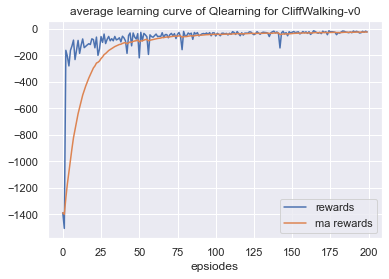

In [18]:
make_dir(cfg.result_path,cfg.model_path)
agent.save(path=cfg.model_path)
save_results(rewards,ma_rewards, tag='train', path=cfg.result_path)
plot_rewards(rewards,ma_rewards, tag='train', env=cfg.env, algo=cfg.algo, path=cfg.result_path)

In [19]:
env, agent = env_agent_config(cfg, seed=10)

In [20]:
agent.load(path=cfg.model_path)
rewards,ma_rewards = eval(cfg,env,agent)

加载模型成功！
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
reward: -1
re

结果保存完毕！


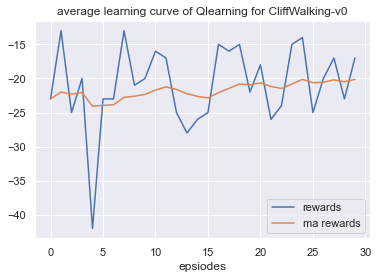

In [21]:
save_results(rewards, ma_rewards, tag='eval',path=cfg.result_path)
plot_rewards(rewards, ma_rewards, tag='eval',env=cfg.env, algo=cfg.algo, path=cfg.result_path)